# **1. Configuración del Ambiente**


---

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
from sqlalchemy import create_engine, text
global df_items_pedidos, df_pedidos, df_productos, df_vendedores, database

# **2. Obtención de datos (Motor DB)**


---

In [23]:
# Conectar a la base de datos
engine = create_engine('sqlite:///database.db')

# Definir la consulta SQL
consulta_sql = text("""
    SELECT
        strftime('%Y-%m-%d %H:%M:%S', p.fecha_compra) AS fecha,
        strftime('%Y', p.fecha_compra) AS año,
        strftime('%m', p.fecha_compra) AS mes,
        strftime('%d', p.fecha_compra) AS dia,
        (p.total - i.costo_envio) AS ingreso_neto,
        pr.marca AS marca,
        pr.producto AS producto
    FROM
        pedidos p
    INNER JOIN
        items_pedidos i ON p.pedido_id = i.pedido_id
    INNER JOIN
        productos pr ON i.producto_id = pr.producto_id
""")

# Ejecutar la consulta SQL y cargar los resultados en un DataFrame
with engine.connect() as connection:
    resultados = connection.execute(consulta_sql)
    df_ingreso_neto = pd.DataFrame(resultados, columns=['fecha', 'año', 'mes', 'dia', 'ingreso_neto', 'marca', 'producto'])

In [24]:
# Mostrar el DataFrame
df_ingreso_neto.head()

,fecha,año,mes,dia,ingreso_neto,marca,producto
0,2019-01-05 00:00:00,2019,01,05,24700.0,Bottega Veneta,Bolsa Intrecciato Caramelo
1,2019-01-05 00:00:00,2019,01,05,480.0,Topshop,Cropped Listras Florzinhas
2,2019-01-05 00:00:00,2019,01,05,667.2,Lezalez,Shorts Jeans Tye Dye
3,2019-01-05 00:00:00,2019,01,05,1260.0,Tigresse,Casaco Branco Costuras
4,2019-01-05 00:00:00,2019,01,05,429.6,Zara,Capa Fio Marrom


In [25]:
# Conectar a la base de datos
engine = create_engine('sqlite:///database.db')

# Definir la consulta SQL
consulta_sql = text("""
    SELECT AVG(total - costo_envio) AS ingreso_neto_promedio_diario_total
    FROM pedidos p
    JOIN items_pedidos i ON p.pedido_id = i.pedido_id;
""")

# Ejecutar la consulta SQL y cargar los resultados en un DataFrame
with engine.connect() as connection:
    resultados = connection.execute(consulta_sql)
    df_ingreso_prom_neto_diario_total = pd.DataFrame(resultados, columns=['ingreso_neto_promedio_diario_total'])

# Mostrar el DataFrame
print(df_ingreso_prom_neto_diario_total)

   ingreso_neto_promedio_diario_total
0                         1494.027563


In [26]:
# Conectar a la base de datos
engine = create_engine('sqlite:///database.db')

# Crear una conexión y ejecutar la consulta SQL
with engine.connect() as connection:
    consulta_sql = text("""
        SELECT strftime('%Y', fecha_compra) AS año,
        AVG(total - costo_envio) AS ingreso_neto_promedio_diario
        FROM pedidos p
        JOIN items_pedidos i ON p.pedido_id = i.pedido_id
        GROUP BY strftime('%Y', fecha_compra);

    """)
    resultados = connection.execute(consulta_sql)
    
    # Convertir los resultados en un DataFrame
    df_ingreso_prom_neto_diario_año = pd.DataFrame(resultados, columns=['año', 'ingreso_neto_promedio_diario'])

In [27]:
df_ingreso_prom_neto_diario_año

,año,ingreso_neto_promedio_diario
0,2019,1497.583737
1,2020,1497.542853
2,2021,1449.856970


In [28]:
# Conectar a la base de datos
engine = create_engine('sqlite:///database.db')

# Definir la consulta SQL
consulta_sql = text("""
    SELECT AVG(total - costo_envio) AS ingreso_neto_promedio_diario_desde_2020
    FROM pedidos p
    JOIN items_pedidos i ON p.pedido_id = i.pedido_id
    WHERE strftime('%Y', fecha_compra) >= '2020';
""")

# Ejecutar la consulta SQL y cargar los resultados en un DataFrame
with engine.connect() as connection:
    resultados = connection.execute(consulta_sql)
    df_ingreso_prom_neto_diario_desde2020 = pd.DataFrame(resultados, columns=['ingreso_neto_promedio_diario_desde_2020'])



In [29]:
df_ingreso_prom_neto_diario_desde2020

,ingreso_neto_promedio_diario_desde_2020
0,1492.252518


In [30]:
df_ingreso_neto.describe()

,ingreso_neto
count,24526.000000
mean,1494.027563
std,2703.794924
min,36.000000
25%,416.000000
50%,840.000000
75%,1536.000000
max,31200.000000


# **3. ¿Cual es la evolución histórica de las ingresos netos?**


---

In [31]:
# Convertir la columna 'fecha' a tipo de datos datetime en el formato correcto

df_ingreso_neto['fecha'] = pd.to_datetime(df_ingreso_neto['fecha'])

# Agrupar los datos por día y calcular las ventas netas diarias
ventas_diarias = df_ingreso_neto.groupby('fecha')['ingreso_neto'].sum()

# Convertir el índice a tipo datetime
ventas_diarias.index = pd.to_datetime(ventas_diarias.index)


# #Crear nueva columna formateada a miles en el ingreso neto
# df_ingresos['Ingreso_neto(K)']=(df_ingresos["Ingreso neto"]/1000).round(4).apply(lambda x: f'${x:.4f}K')

In [32]:
print(df_ingreso_neto.info())
print("--------------------")
print(ventas_diarias.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24526 entries, 0 to 24525
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         24526 non-null  datetime64[ns]
 1   año           24526 non-null  object        
 2   mes           24526 non-null  object        
 3   dia           24526 non-null  object        
 4   ingreso_neto  24526 non-null  float64       
 5   marca         24526 non-null  object        
 6   producto      24526 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.3+ MB
None
--------------------
<class 'pandas.core.series.Series'>
DatetimeIndex: 780 entries, 2019-01-05 to 2021-03-10
Series name: ingreso_neto
Non-Null Count  Dtype  
--------------  -----  
780 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB
None


In [33]:
#**Ventas netas el 24-11-2019**

# Filtrar los datos para obtener solo las ventas del día 24 de noviembre de 2019
ventas_24_nov_2019 = df_ingreso_neto[df_ingreso_neto['fecha'] == '2019-11-24']

# Calcular la suma total de ingresos netos para ese día
suma_ventas_24_nov_2019 = ventas_24_nov_2019['ingreso_neto'].sum()


# Filtrar los datos para obtener las ganancias netas del 24 de noviembre de 2019
ganancias_24nov = df_ingreso_neto[df_ingreso_neto['fecha'] == '2019-11-24']

# Calcular las ganancias netas por marca
ganancias_por_marca = ganancias_24nov.groupby('marca')['ingreso_neto'].sum()

# Ordenar las marcas por ganancias netas en orden descendente y seleccionar las 5 primeras
top_5_marcas = ganancias_por_marca.nlargest(5)

# Calcular el total de ganancias netas para las 5 principales marcas
total_top_5 = top_5_marcas.sum()

# Calcular el resto de las ganancias netas
resto = ganancias_por_marca.sum() - total_top_5

# Crear un DataFrame con las 5 principales marcas y el resto
data = pd.concat([top_5_marcas, pd.Series(resto, index=['Otros'])])

### **3.1 Vizualisación**

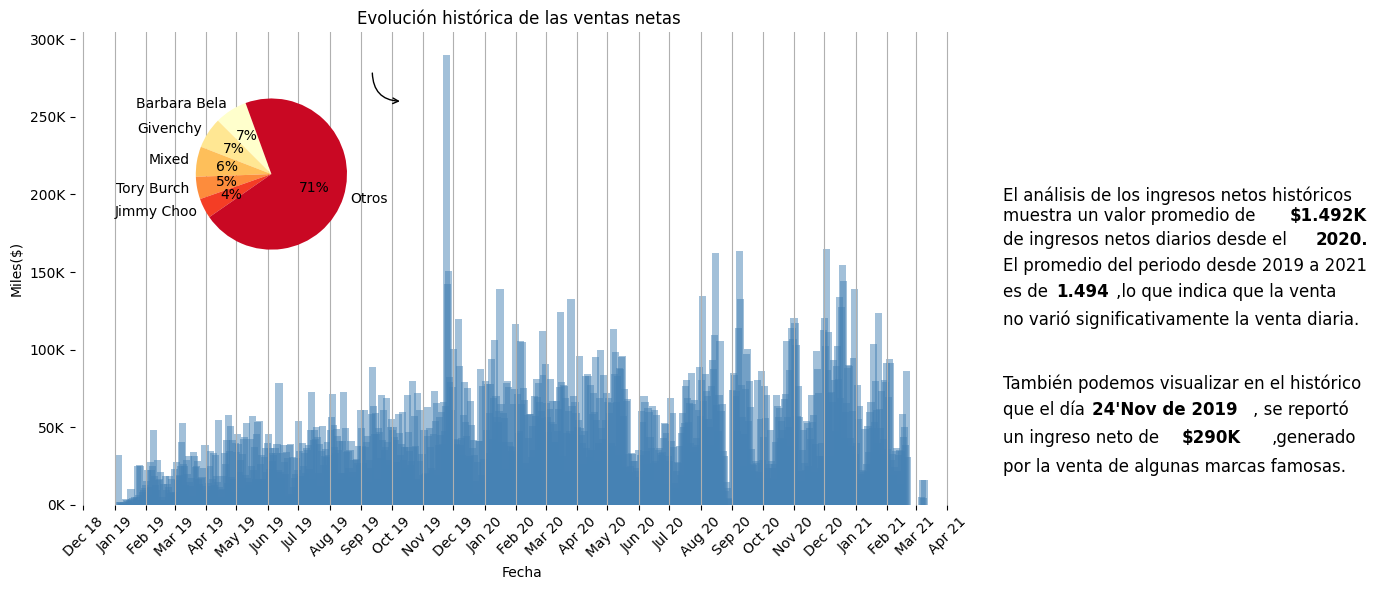

In [34]:
# Configurar el gráfico con subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [5, 1]})

# Graficar las ventas netas diarias
ax1.bar(ventas_diarias.index, ventas_diarias.values, color='steelblue', label='Ventas Netas Diarias', width=7, alpha=0.5)

# Configurar los ejes y el título
ax1.set_title('Evolución histórica de las ventas netas ')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Miles($)')
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar cada mes en el eje X
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Formatear las etiquetas del eje X como "Jan 19", "Feb 19", etc.
ax1.tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
# ax1.legend()  # Mostrar la leyenda

# Formatear los valores de los ingresos netos en la escala de miles(K)
formatter = plt.FuncFormatter(lambda x, _: '{:,.0f}K'.format(x/1000))
ax1.yaxis.set_major_formatter(formatter)

# Graficar el gráfico de torta de distribución de ganancias netas por marca el 24 de Noviembre de 2019

# Crear una paleta de colores degradada de azul
num_segmentos = 6
colores = [cm.YlOrRd(i/num_segmentos) for i in range(num_segmentos)]
#pink, hot
# Graficar la distribución en un gráfico de torta
ax_torta = ax1.inset_axes([0.02, 0.5, 0.4, 0.4])  # Insertar un eje para el gráfico de torta
ax_torta.pie(data, labels=data.index, autopct='%1.0f%%', startangle=110, colors=colores)
ax_torta.set_title('')  # Quitar el título del gráfico de torta

# Anotar la relación entre el gráfico de torta y la fecha en el gráfico de barras
ax1.annotate('', xy=(ventas_diarias.index[280], 260e3), xytext=(ventas_diarias.index[250], 280e3),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.5'))

# Eliminar la visualización del marco del gráfico
ax1.set_frame_on(False)

# Trazar líneas suaves en cada nivel del eje y
ax1.grid(axis='x')

# Agregar el texto adicional en el segundo subplot
# Crear comentarios del análisis del gráfico
analisis = "El análisis de los ingresos netos históricos\nmuestra un valor promedio de"
ax2.text(0.1, 0.6, analisis, fontsize=12)
# Mostrar el valor promedio de ingreso neto diario
ax2.text(1.7, 0.6, "${:.3f}K".format(df_ingreso_prom_neto_diario_desde2020.iloc[0, 0]/1e3), fontsize=12, fontweight="bold")
ax2.text(0.1, 0.55, "de ingresos netos diarios desde el", fontsize=12)
ax2.text(1.85, 0.55, "2020.", fontsize=12, fontweight="bold")
ax2.text(0.1, 0.45, "El promedio del periodo desde 2019 a 2021\n", fontsize=12)
ax2.text(0.1, 0.44, "es de ", fontsize=12)
ax2.text(0.4, 0.44, "1.494", fontsize=12, fontweight="bold")
ax2.text(0.73, 0.44, ",lo que indica que la venta", fontsize=12)
ax2.text(0.1, 0.38, "no varió significativamente la venta diaria.", fontsize=12)
ax2.text(0.1, 0.20, "También podemos visualizar en el histórico\n", fontsize=12)
ax2.text(0.1, 0.19, "que el día", fontsize=12, color="k")
ax2.text(0.6, 0.19, "24'Nov de 2019", fontsize=12, fontweight="bold")
ax2.text(1.5, 0.19, ", se reportó", fontsize=12, color="k")
ax2.text(0.1, 0.13, "un ingreso neto de", fontsize=12)
ax2.text(1.1, 0.13, "${:.0f}K".format(suma_ventas_24_nov_2019/1e3), fontsize=12, fontweight="bold")
ax2.text(1.6, 0.13, ",generado", fontsize=12)
ax2.text(0.1, 0.07, "por la venta de algunas marcas famosas.", fontsize=12)

# Quitar ejes del segundo subplot
ax2.axis('off')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
